# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
#uploading the data
data = pd.read_csv('/Users/manpreet/Documents/pythonproject/ml-project-supervised-learning/diabetes.csv')

In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
#finding Correlation between predictor variables and the outcome variable
correlation = data.corr()
correlation_with_outcome = correlation['Outcome'].sort_values(ascending=False)
print("Correlation with Outcome:\n", correlation_with_outcome)

Correlation with Outcome:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


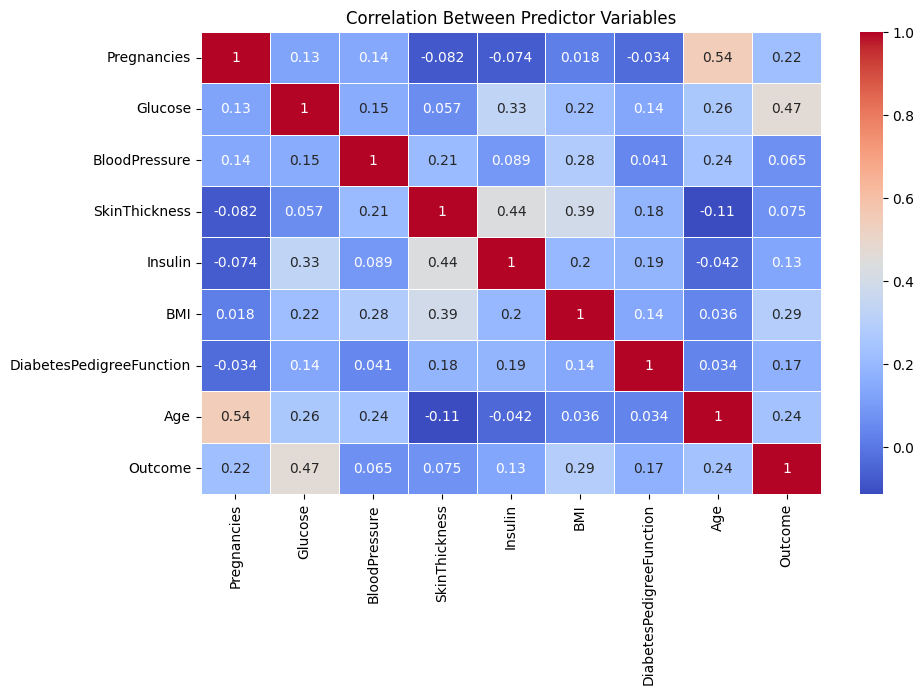

In [6]:
#Correlation between predictor variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Between Predictor Variables")
plt.show()

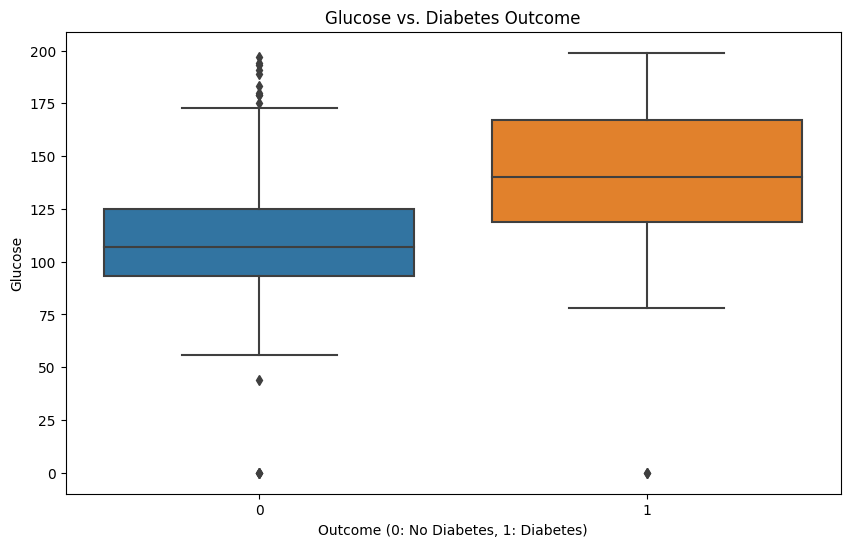

In [9]:
# Relationship between Glucose and Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title("Glucose vs. Diabetes Outcome")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Glucose")
plt.show()

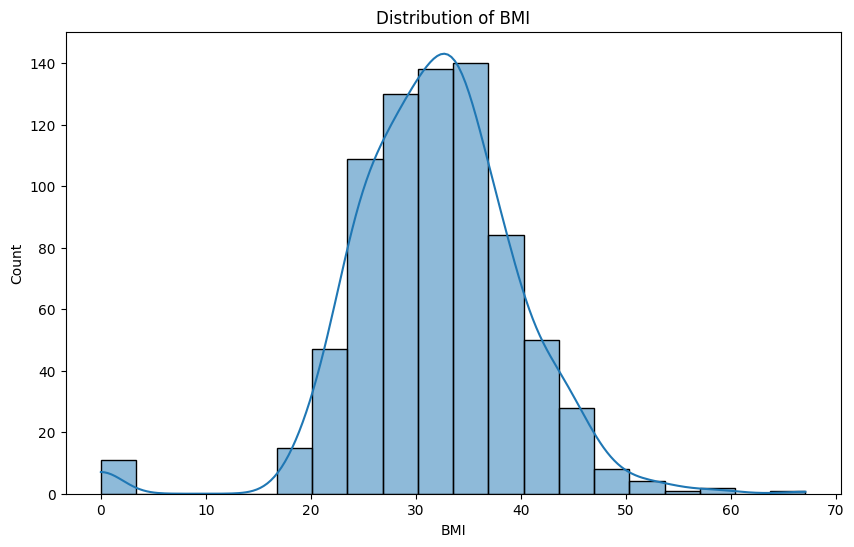

In [12]:
#Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [13]:
#Summary Statistics for Age
summary_stats_age = data['Age'].describe()
print("Summary Statistics for Age:\n", summary_stats_age)

Summary Statistics for Age:
 count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


In [14]:
#Grouping and Averaging
average_glucose_diabetes = data[data['Outcome'] == 1]['Glucose'].mean()
average_glucose_no_diabetes = data[data['Outcome'] == 0]['Glucose'].mean()
print("Average Glucose for Individuals with Diabetes:", average_glucose_diabetes)
print("Average Glucose for Individuals without Diabetes:", average_glucose_no_diabetes)

average_bmi_diabetes = data[data['Outcome'] == 1]['BMI'].mean()
average_bmi_no_diabetes = data[data['Outcome'] == 0]['BMI'].mean()
print("Average BMI for Individuals with Diabetes:", average_bmi_diabetes)
print("Average BMI for Individuals without Diabetes:", average_bmi_no_diabetes)

Average Glucose for Individuals with Diabetes: 141.25746268656715
Average Glucose for Individuals without Diabetes: 109.98
Average BMI for Individuals with Diabetes: 35.14253731343284
Average BMI for Individuals without Diabetes: 30.3042


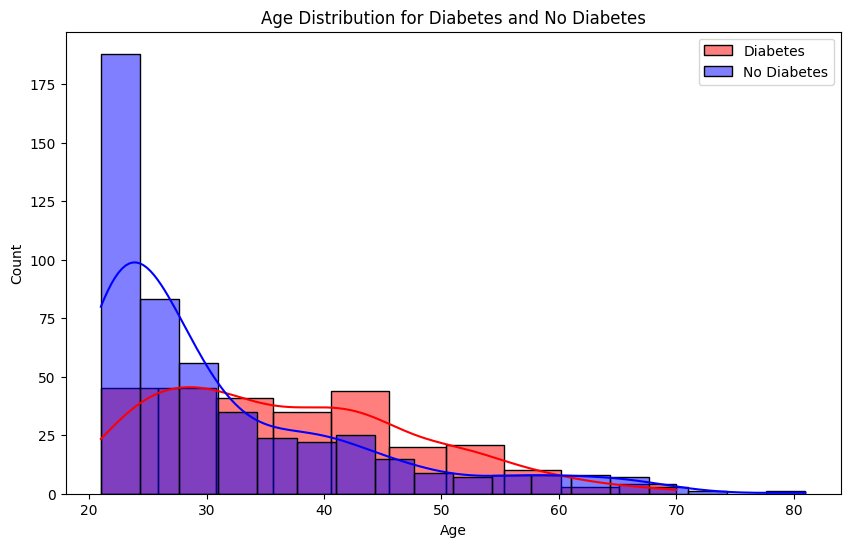

In [17]:
#Age Distribution for Diabetes and No Diabetes
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Outcome'] == 1]['Age'], color='red', label='Diabetes', kde=True)
sns.histplot(data[data['Outcome'] == 0]['Age'], color='blue', label='No Diabetes', kde=True)
plt.title("Age Distribution for Diabetes and No Diabetes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

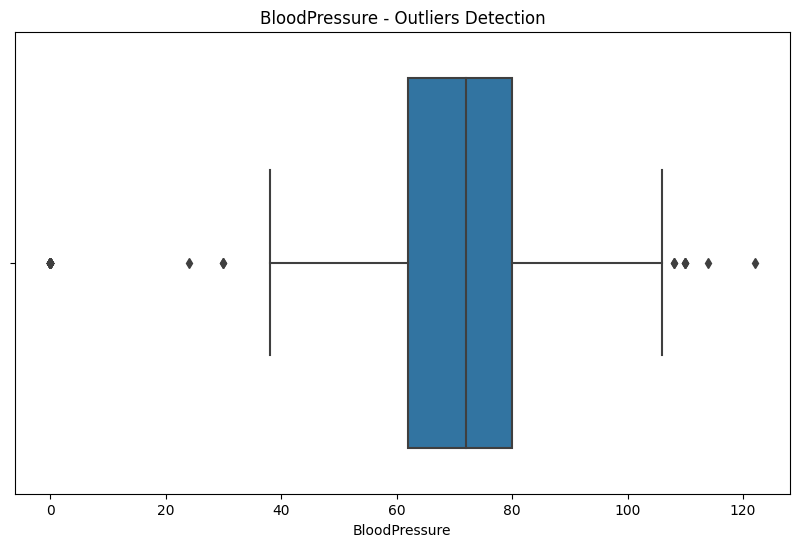

In [18]:
#Outliers Detection w.r.t Bloodpressure
plt.figure(figsize=(10, 6))
sns.boxplot(x='BloodPressure', data=data)
plt.title("BloodPressure - Outliers Detection")
plt.xlabel("BloodPressure")
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [40]:
#There are no missing values
missing_values = data.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

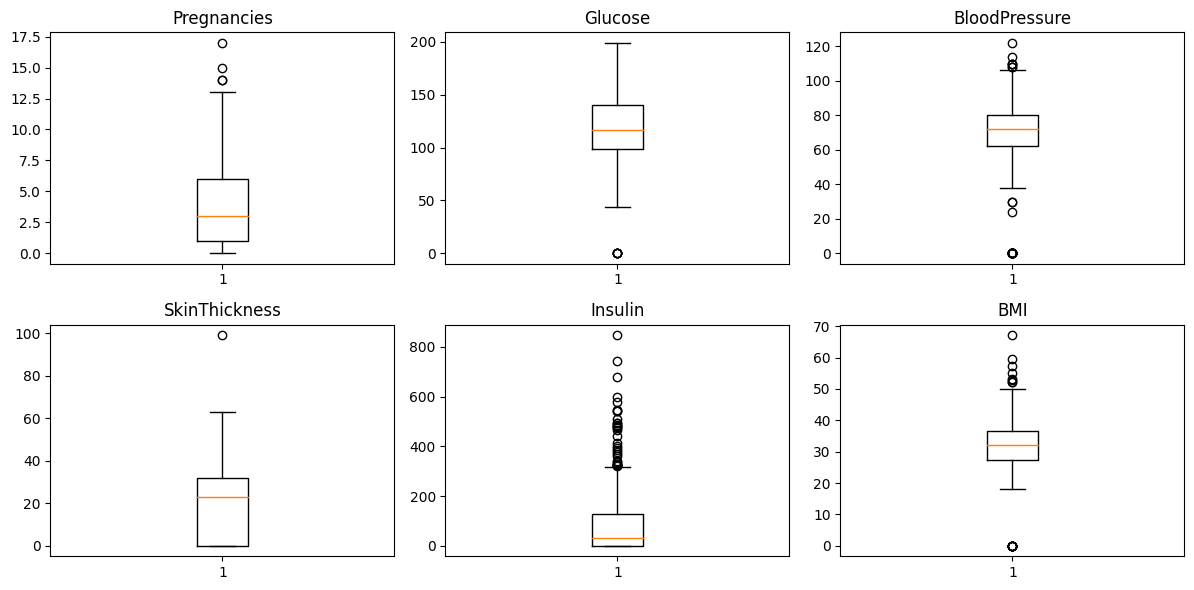

In [41]:
#Checking outliers

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.boxplot(data['Pregnancies'])
plt.title('Pregnancies')

plt.subplot(2, 3, 2)
plt.boxplot(data['Glucose'])
plt.title('Glucose')

plt.subplot(2, 3, 3)
plt.boxplot(data['BloodPressure'])
plt.title('BloodPressure')

plt.subplot(2, 3, 4)
plt.boxplot(data['SkinThickness'])
plt.title('SkinThickness')

plt.subplot(2, 3, 5)
plt.boxplot(data['Insulin'])
plt.title('Insulin')

plt.subplot(2, 3, 6)
plt.boxplot(data['BMI'])
plt.title('BMI')

plt.tight_layout()
plt.show()


In [57]:
def handle_outliers_with_imputation(data, column, imputation_method='median'):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if imputation_method == 'median':
        impute_value = data[column].median()
    elif imputation_method == 'mean':
        impute_value = data[column].mean()
    else:
        raise ValueError("Invalid imputation method. Use 'median' or 'mean'.")

    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), impute_value, data[column])

# Replace outliers in 'BloodPressure' with median
handle_outliers_with_imputation(data, 'BloodPressure', imputation_method='median')

# Replace outliers in 'SkinThickness' with median
handle_outliers_with_imputation(data, 'SkinThickness', imputation_method='median')

# Replace outliers in 'Pregnancies' with median
handle_outliers_with_imputation(data, 'Pregnancies', imputation_method='median')

# Replace outliers in 'Glucose' with median
handle_outliers_with_imputation(data, 'Glucose', imputation_method='median')

# Replace outliers in 'BMI' with median
handle_outliers_with_imputation(data, 'BMI', imputation_method='median')

# Now, let's handle outliers for 'Insulin'
handle_outliers_with_imputation(data, 'Insulin', imputation_method='median')

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate the features (X) and the target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Initialize StandardScaler and MinMaxScaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Scale the features using StandardScaler
X_standard_scaled = standard_scaler.fit_transform(X)

# Scale the features using MinMaxScaler
X_minmax_scaled = minmax_scaler.fit_transform(X)


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [60]:
# Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [64]:
# Train a Random Forest Classifier (ensemble model)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Make predictions on the test set
logistic_preds = logistic_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [66]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [67]:
# Evaluate the Logistic Regression model
logistic_accuracy, logistic_precision, logistic_recall, logistic_f1, logistic_roc_auc = evaluate_model(y_test, logistic_preds)

# Evaluate the Random Forest Classifier model
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(y_test, rf_preds)

In [68]:
# Print evaluation metrics for both models
print("Logistic Regression Metrics:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")
print(f"F1-score: {logistic_f1:.2f}")
print(f"ROC-AUC: {logistic_roc_auc:.2f}")

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")
print(f"ROC-AUC: {rf_roc_auc:.2f}")

Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.66
Recall: 0.64
F1-score: 0.65
ROC-AUC: 0.73

Random Forest Classifier Metrics:
Accuracy: 0.75
Precision: 0.67
Recall: 0.62
F1-score: 0.64
ROC-AUC: 0.72


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Model Performance: Both Logistic Regression and Random Forest Classifier models demonstrated reasonably good performance in predicting diabetes outcomes. They achieved similar accuracy scores around 75%, indicating their effectiveness in making correct predictions.

Trade-off Between Precision and Recall: The choice between these models should consider the trade-off between precision and recall. Logistic Regression exhibited a slightly higher recall, making it suitable if the goal is to correctly identify a higher proportion of actual positive diabetes cases. On the other hand, Random Forest showed slightly better precision, making it preferable when minimizing false positive predictions is crucial.

Data Quality: The EDA revealed no missing values in the dataset, simplifying the preprocessing stage. However, it was observed that some predictor variables had outliers. These outliers were addressed through imputation techniques, enhancing the robustness of the models.

Further Analysis: While both models performed well, there is room for further analysis and model tuning. Techniques such as hyperparameter optimization and cross-validation could be employed to fine-tune the models and potentially improve their performance.